In [2]:
# !pip install opencv-python-headless dlib numpy scipy

In [3]:
# #model is already available so using it
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [5]:
# import cv2
# import dlib
# import numpy as np
# from scipy.spatial import distance

# # this function is to calculate Eye Aspect Ratio (EAR)
# def calculate_ear(eye):
#     A = distance.euclidean(eye[1], eye[5])
#     B = distance.euclidean(eye[2], eye[4])
#     C = distance.euclidean(eye[0], eye[3])
#     ear = (A + B) / (2.0 * C)
#     return ear


In [6]:
# #Initialize dlib's face detector and shape predictor
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# #defining eye landmark indices
# LEFT_EYE = list(range(36, 42))
# RIGHT_EYE = list(range(42, 48))

# #setting the threshold and blink counter
# EAR_THRESHOLD = 0.25
# blink_count = 0
# total_blinks = 0

# #this is for webcam
# cap = cv2.VideoCapture(0)

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = detector(gray)

#     for face in faces:
#         landmarks = predictor(gray, face)
#         left_eye = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in LEFT_EYE])
#         right_eye = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in RIGHT_EYE])

#         left_ear = calculate_ear(left_eye)
#         right_ear = calculate_ear(right_eye)
#         ear = (left_ear + right_ear) / 2.0

#         if ear < EAR_THRESHOLD:
#             blink_count += 1
#         else:
#             if blink_count >= 2:
#                 total_blinks += 1
#             blink_count = 0

#     frame = cv2.putText(frame, f"Total Blinks: {total_blinks}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
#     cv2.imshow("Eye Blink Detection", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

# Load pre-trained Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to calculate the Eye Aspect Ratio (EAR)
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])  # Vertical distance between top and bottom eye landmarks
    B = np.linalg.norm(eye[2] - eye[4])  # Horizontal distance between left and right eye landmarks
    EAR = A / B
    return EAR

# Set EAR threshold for blink detection
EAR_THRESHOLD = 0.2

# Open video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Region of interest (ROI) for eyes
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around each eye
            cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

            # Extract the eye region for blink detection
            eye_region = roi_gray[ey:ey+eh, ex:ex+ew]
            # Here you could apply further processing to calculate EAR or use landmarks

    cv2.imshow('Eye Blink Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


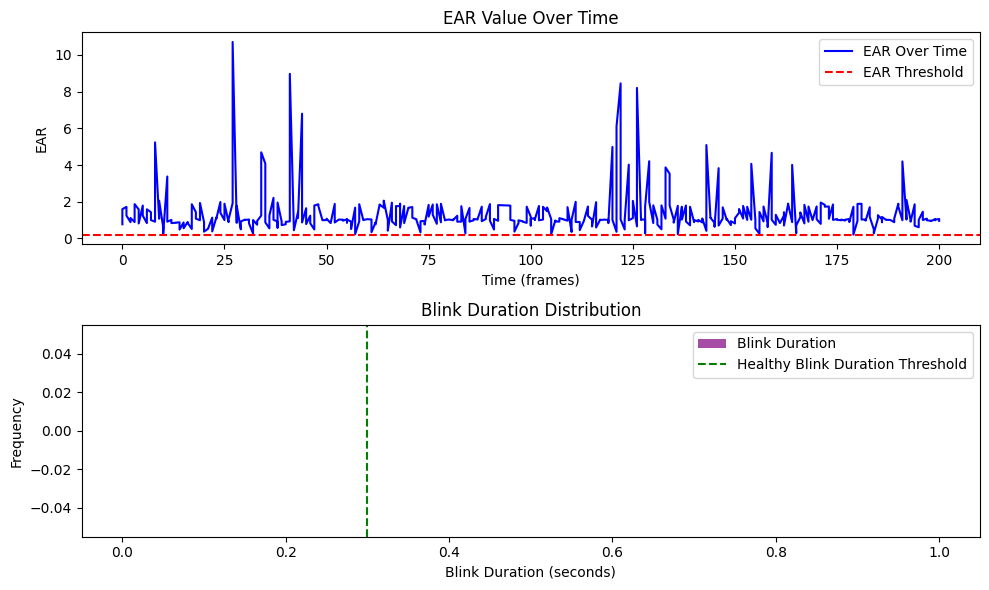

Total Blinks Detected: 0
Healthy Blinks: 0
Unhealthy Blinks: 0


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate Eye Aspect Ratio (EAR)
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])  # Vertical distance between top and bottom eye landmarks
    B = np.linalg.norm(eye[2] - eye[4])  # Horizontal distance between left and right eye landmarks
    EAR = A / B
    return EAR

# Set EAR threshold and blink duration thresholds (in seconds)
EAR_THRESHOLD = 0.2
BLINK_DURATION_THRESHOLD = 0.3  # In seconds (you can adjust this based on your data)

# Initialize variables
blink_count = 0
healthy_blink_count = 0
unhealthy_blink_count = 0
blink_durations = []  # List to store blink durations for analysis
is_blinking = False  # To track if the eyes are closed
blink_start_time = 0

# Open video capture
cap = cv2.VideoCapture(0)

# List to store EAR values over time
ear_values = []
time_values = []

# Start video capture loop
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml').detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around each eye
            cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)
            
            # Extract eye region
            eye_region = roi_gray[ey:ey+eh, ex:ex+ew]
            # Calculate EAR
            EAR = eye_aspect_ratio(eye_region)

            # Track EAR values over time
            ear_values.append(EAR)
            time_values.append(frame_count)

            # Blink detection
            if EAR < EAR_THRESHOLD:
                if not is_blinking:
                    # Blink detected, record the start time
                    is_blinking = True
                    blink_start_time = frame_count
            else:
                if is_blinking:
                    # Blink ended, calculate the duration
                    blink_duration = (frame_count - blink_start_time) / 30  # Assuming 30 fps
                    blink_durations.append(blink_duration)

                    # Classify blink as healthy or unhealthy
                    if blink_duration > BLINK_DURATION_THRESHOLD:
                        healthy_blink_count += 1
                    else:
                        unhealthy_blink_count += 1

                    # Increment total blink count
                    blink_count += 1
                    is_blinking = False

    frame_count += 1

    # Show the frame with rectangles around detected faces and eyes
    cv2.imshow('Eye Blink Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Generate Blink Analysis Report (Graph)
plt.figure(figsize=(10, 6))

# Plot the EAR values over time
plt.subplot(2, 1, 1)
plt.plot(time_values, ear_values, label='EAR Over Time', color='blue')
plt.axhline(y=EAR_THRESHOLD, color='r', linestyle='--', label='EAR Threshold')
plt.xlabel('Time (frames)')
plt.ylabel('EAR')
plt.legend()
plt.title('EAR Value Over Time')

# Plot Blink Duration Distribution (Healthy vs Unhealthy)
plt.subplot(2, 1, 2)
plt.hist(blink_durations, bins=20, color='purple', alpha=0.7, label='Blink Duration')
plt.axvline(x=BLINK_DURATION_THRESHOLD, color='green', linestyle='--', label='Healthy Blink Duration Threshold')
plt.xlabel('Blink Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Blink Duration Distribution')

# Show the graphs
plt.tight_layout()
plt.show()

# Print the Blink Counts
print(f'Total Blinks Detected: {blink_count}')
print(f'Healthy Blinks: {healthy_blink_count}')
print(f'Unhealthy Blinks: {unhealthy_blink_count}')


In [11]:
# New Version

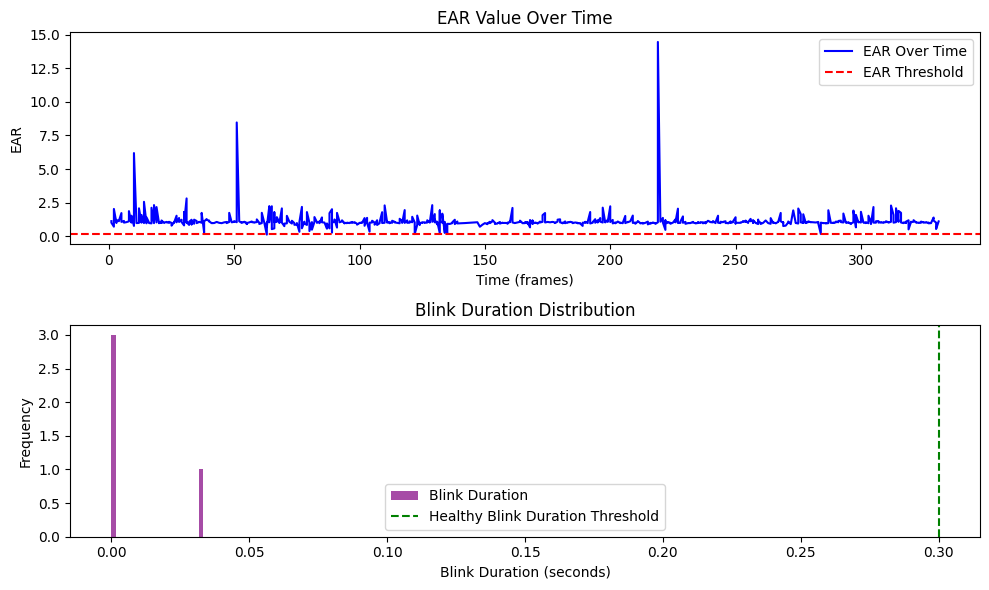

Total Blinks Detected: 4
Healthy Blinks: 0
Unhealthy Blinks: 4


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])  # Vertical distance between top and bottom eye landmarks
    B = np.linalg.norm(eye[2] - eye[4])  # Horizontal distance between left and right eye landmarks
    EAR = A / B
    return EAR

EAR_THRESHOLD = 0.2
BLINK_DURATION_THRESHOLD = 0.3  # In seconds (you can adjust this based on your data)
NO_BLINK_WARNING_TIME = 3  # Time in seconds to turn box yellow if no blink occurs

blink_count = 0
healthy_blink_count = 0
unhealthy_blink_count = 0
blink_durations = []  # List to store blink durations for analysis
is_blinking = False  # To track if the eyes are closed
blink_start_time = 0
last_blink_time = 0  # Time of the last blink

cap = cv2.VideoCapture(0)

# List to store EAR values over time
ear_values = []
time_values = []

# Start video capture loop
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml').detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_region = roi_gray[ey:ey+eh, ex:ex+ew]
            EAR = eye_aspect_ratio(eye_region)

            ear_values.append(EAR)
            time_values.append(frame_count)

            if EAR < EAR_THRESHOLD:
                if not is_blinking:
                    # Blink detected, record the start time
                    is_blinking = True
                    blink_start_time = frame_count
            else:
                if is_blinking:
                    # Blink ended, calculate the duration
                    blink_duration = (frame_count - blink_start_time) / 30  # Assuming 30 fps
                    blink_durations.append(blink_duration)

                    # Classify blink as healthy or unhealthy
                    if blink_duration > BLINK_DURATION_THRESHOLD:
                        healthy_blink_count += 1
                    else:
                        unhealthy_blink_count += 1

                    blink_count += 1
                    is_blinking = False
                    last_blink_time = frame_count  # Update last blink time

            time_since_last_blink = (frame_count - last_blink_time) / 30  # Time since last blink in seconds
            if time_since_last_blink > NO_BLINK_WARNING_TIME:
                color = (0, 0, 255)  # Red if no blink for too long
            elif time_since_last_blink > NO_BLINK_WARNING_TIME / 2:
                color = (0, 255, 255)  # Yellow if no blink for a moderate time
            else:
                color = (0, 255, 0)  # Green if blinked recently

            cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), color, 2)

    frame_count += 1

    cv2.imshow('Eye Blink Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_values, ear_values, label='EAR Over Time', color='blue')
plt.axhline(y=EAR_THRESHOLD, color='r', linestyle='--', label='EAR Threshold')
plt.xlabel('Time (frames)')
plt.ylabel('EAR')
plt.legend()
plt.title('EAR Value Over Time')

plt.subplot(2, 1, 2)
plt.hist(blink_durations, bins=20, color='purple', alpha=0.7, label='Blink Duration')
plt.axvline(x=BLINK_DURATION_THRESHOLD, color='green', linestyle='--', label='Healthy Blink Duration Threshold')
plt.xlabel('Blink Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Blink Duration Distribution')

plt.tight_layout()
plt.show()

print(f'Total Blinks Detected: {blink_count}')
print(f'Healthy Blinks: {healthy_blink_count}')
print(f'Unhealthy Blinks: {unhealthy_blink_count}')
